In [27]:
!pip install langgraph
from typing import Dict,TypedDict
from langgraph.graph import StateGraph


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\mdmaz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
class AgentState(TypedDict):
    values: list[int]
    name: str
    operation: str
    result: str

In [29]:
import math
def operation_node(state:AgentState) ->AgentState:
    """ This function handels multiple input function and it makes the sum and multiplications """

    if state["operation"] == "+":
        state["result"] = f"Hi there, {state['name']}, your operation is {state['operation']} and the result is = {sum(state['values'])}"
        return state
    elif state["operation"] == "*":
        state["result"] = f"Hi there, {state['name']}, your operation is {state['operation']} and the result is = {math.prod(state['values'])}"
        return state
    else:
        state["result"] = "No operation found"
        return state

In [30]:
graph = StateGraph(AgentState)
graph.add_node("operation", operation_node)
graph.set_entry_point("operation")
graph.set_finish_point("operation")
app = graph.compile()

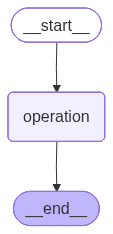

In [31]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
answer =  app.invoke({"values":[1,2,3,4], "name":"bob", "operation":"-"})
answer["result"]

'No operation found'